In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from matplotlib._png import read_png
import pandas as pd
import numpy as np
import datetime

name = '17-03-30'
df = pd.read_excel(name+'_data.xlsx')
df = df.fillna('')
print('Cycle Length: '+str(df.shape[0])+' days')
df.tail()

Cycle Length: 36 days


,Date,Discharge,Intercourse,Sticker,Peak
31,2017-04-30,4 AD,I,,
32,2017-05-01,8C X2,I,,
33,2017-05-02,8C AD,,,
34,2017-05-03,2W X1,I,,
35,2017-05-04,8C X2,,,


In [2]:
# DETERMINE STICKERS
for row in range(0,df.shape[0]):
    chart = df.ix[row,'Discharge']
    # Red
    if 'H' in chart or 'M' in chart or 'VL' in chart or 'B' in chart:
        df.ix[row,'Sticker'] = 'red'
    # Red (L = Light Flow, eliminating "with lubrication" modifier on 6/8/10)
    if 'L' in chart and '6' not in chart and '8' not in chart and '10' not in chart:
        df.ix[row,'Sticker'] = 'red'
    # Identify days with peak-type (10, K, L)
    if df.ix[row,'Sticker'] != 'red':
        if 'K' in chart or '10' in chart or ('L' in chart and ('2' in chart or '4' in chart or '6' in chart)):
            df.ix[row,'Peak'] = '*'

# Identify and mark peak days and count of 3
peaks = []
for row in range(0,df.shape[0]):
    # Identify peak days
    if df.ix[row,'Peak'] == '*' and df.ix[row+1,'Peak'] != '*':
        peaks.append(row)  
for peak in peaks:
    df.ix[peak,'Peak'] = 'P'
    df.ix[peak+1,'Peak'] = '1'
    df.ix[peak+2,'Peak'] = '2'
    df.ix[peak+3,'Peak'] = '3'

for row in range(0,df.shape[0]):
    chart = df.ix[row,'Discharge']
    peak = df.ix[row,'Peak']
    sticker = df.ix[row,'Sticker']
    if len(sticker)<1:
        if '0 ' in chart or '2 ' in chart or '2W ' in chart or '4 ' in chart:
            if peak == '1':
                df.ix[row,'Sticker'] = 'green_baby_1'
            elif peak == '2':
                df.ix[row,'Sticker'] = 'green_baby_2'
            elif peak == '3':
                df.ix[row,'Sticker'] = 'green_baby_3'
            else: 
                df.ix[row,'Sticker'] = 'green'
        else:
            if peak == '1':
                df.ix[row,'Sticker'] = 'white_baby_1'
            elif peak == '2':
                df.ix[row,'Sticker'] = 'white_baby_2'
            elif peak == '3':
                df.ix[row,'Sticker'] = 'white_baby_3'
            else:
                if peak=='P':
                    df.ix[row,'Sticker'] = 'white_baby_P'
                else:
                    df.ix[row,'Sticker'] = 'white_baby'

df['Record'] = df['Discharge']+' '+df['Intercourse']
df.to_csv(name+'_data_stickers.csv')
df.head(36)

,Date,Discharge,Intercourse,Sticker,Peak,Record
0,2017-03-30,M,,red,,M
1,2017-03-31,H,,red,,H
2,2017-04-01,L 0 AD,,red,,L 0 AD
3,2017-04-02,M,,red,,M
4,2017-04-03,VL 10B X1,,red,,VL 10B X1
5,2017-04-04,VL 10B X1,,red,,VL 10B X1
6,2017-04-05,6B X1,,red,,6B X1
7,2017-04-06,8B X1,,red,,8B X1
8,2017-04-07,4 X2,,green,,4 X2
9,2017-04-08,4 X1,,green,,4 X1


Done.


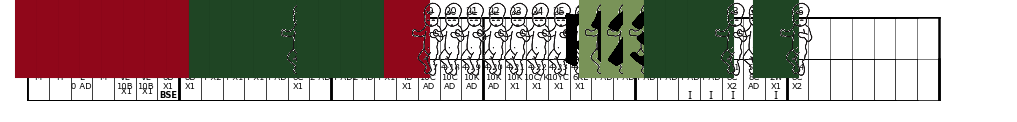

In [3]:
def plot_chart(df, name):
  
    # function to plot sticker images 
    def plot_image(x, y, path, zoom):
        arr_hand = read_png(path)
        imagebox = OffsetImage(arr_hand, zoom=zoom)
        xy = [x, y]
        ab = AnnotationBbox(imagebox, xy, xybox=(0, 0), xycoords='data', boxcoords="offset points", frameon=False)
        ax.add_artist(ab)
        
    # configure axes
    fig = plt.gcf()
    fig.clf()
    plt.figure(figsize=(7*5/2,3/2), dpi=150)
    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False) # below lines remove top/right axes
    ax.spines['left'].set_visible(False) 
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.axis('off')

    # plot grid
    plt.text(6.5,.15,'BSE',ha='center',size='smaller',weight='bold')
    width1=.5
    width2=2.5
    for x in range(0,7*6+1):
        for y in range(0,4+1,2):
            if x % 7 == 0:
                plt.plot([x,x],[0,y],'-k',linewidth=width2)
            else:
                plt.plot([x,x],[0,y],'-k',linewidth=width1)
            
            if y % 4 ==0:
                plt.plot([0,x],[y,y],'-k',linewidth=width2)
            else: 
                plt.plot([0,x],[y,y],'-k',linewidth=width1)
            
    # plot day number, date, and observation text
    for row in range(0,df.shape[0]):
        plt.text(row+.5, 4.1, row+1,ha='center') # plot day number
        date = df.ix[row,'Date']
        intercourse = df.ix[row,'Intercourse']
        discharge = df.ix[row,'Discharge']
        discharge = discharge.rstrip()
        plt.text(row+.5,1.5,str(date.month)+'-'+str(date.day),ha='center',name='Verdana',size='smaller')
        if 'I' in intercourse:
            plt.text(row+.5,.1,intercourse,ha='center',name='Verdana')
        if len(discharge)<5:
            plt.text(row+.5,1,discharge,ha='center',name='Verdana',size='smaller')
        else: 
            space = discharge.find(' ')
            plt.text(row+.5,1,discharge[0:space],ha='center',name='Verdana',size='smaller')
            row2 = discharge[space+1:]
            if len(row2)<6:
                plt.text(row+.5,.55,row2,ha='center',name='Verdana',size='smaller')
            else:
                space = row2.find(' ')
                plt.text(row+.5,.55,row2[0:space],ha='center',name='Verdana',size='smaller')
                plt.text(row+.5,.35,row2[space:],ha='center',name='Verdana',size='smaller')
                    
        #call plot_image function
        sticker = str(df.ix[row,'Sticker'])
        path = sticker+'.png'
        plot_image(row+.5, 2.95, path, .125)
 
    # save & show plot
    plt.draw()
    plt.savefig(name+'.png', dpi=150, bbox_inches='tight')
    #plt.show()

# -------------------------------------------------------
plot_chart(df, name)
print('Done.')

In [4]:
# white baby is from Jeff Geerling: https://www.jeffgeerling.com/blog/2010/dancing-baby-illustration